**BETEL**

In [2]:
from functions.functions import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv
import time
import os

In [3]:
user = "dim"

# Regression data

Replicate the first simulation of the paper

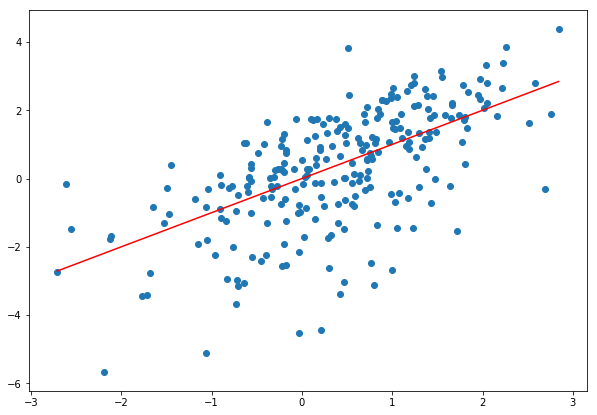

In [4]:
np.random.seed(1235)
n = 250
z, y = generate_regression(n,alpha=0,beta=1)
plt.figure(figsize = (10,7))
x = np.linspace(np.min(z),np.max(z),2)
plt.plot(x,x, c="r")
plt.scatter(z,y)
plt.show()

In [6]:
e = y-z
print(np.mean(e)) # -> 0 

# Theoretical v -> 3*mu*s^2 + mu^3
mu1 = 0.75
sigma1 = 0.75
mu2 = -0.75
sigma2 = 1.25
est = (1/2)*(3*mu1*sigma1**2 + mu1**3 + 3*mu2*sigma2**2 + mu2**3)
print(est)

# on data
print(np.mean(e**3))

-0.012205575644978083
-1.125
-1.127013677848675


# Compute the Mode

We use a window around the true parameters to find the mode of the logETEL function but in practice we do not have access to them! We show with a heatmap/contour plot that the grid approximate the contour plot of a Gaussian distribution.

In [7]:
t = 20
alpha_s = np.linspace(-1,1,t)
beta_s = np.linspace(0,2,t)
v_s = np.linspace(-1,1,t)
res = np.zeros((t,t,t))
c=0

In [8]:
for ix,i in enumerate(alpha_s):
    for jx,j in enumerate(beta_s):
        for lx,l in enumerate(v_s):
            x=np.array([i,j,l])
            v,_,_ =calculate_posterior(x,y,z)
            if v==None:
                continue
            res[ix,jx,lx] = v
            c+=1
            if c%50==0:
                print(c)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000


In [9]:
np.save("./log/grid2500",res)
res=np.load("./log/grid2500.npy")

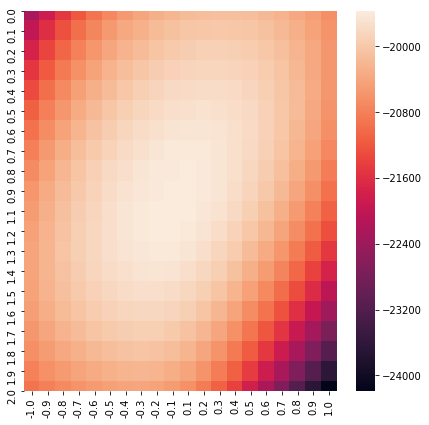

In [10]:
# Seaborn heatmap 
v_pos = 1
x_axis_labels = np.round(alpha_s,1) # labels for x-axis
y_axis_labels = np.round(beta_s,1) # labels for y-axis
plt.figure(figsize = (7,7))
sns.heatmap(res[:,:,v_pos], xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

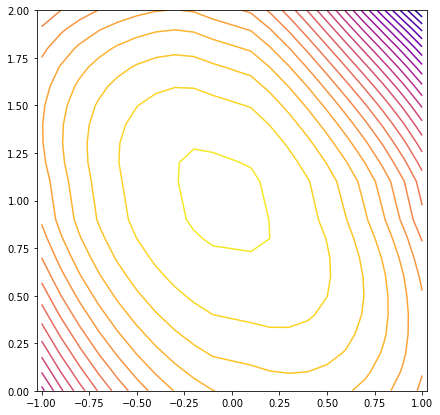

In [11]:
# Contour plot
plt.figure(figsize = (7,7))
X, Y = np.meshgrid(x_axis_labels, y_axis_labels)
plt.contour(X, Y, res[:,:,v_pos],25,cmap='plasma')
plt.axis('equal');
plt.show()

In [12]:
# Get the mode
res[res==0]=-np.infty
print(np.max(res),np.argmax(res))
a,b,c = np.unravel_index(np.argmax(res, axis=None), res.shape)
print("Mode: ", alpha_s[a], beta_s[b], v_s[c])

-19565.472129203303 4180
Mode:  0.05263157894736836 0.9473684210526315 -1.0


# Metropolis Hasting

In [13]:
mean = np.array([alpha_s[a], beta_s[b], v_s[c]])
cov = -inv(approx_hessian(mean[0],mean[1],mean[2],y,z))
print(mean)
print(cov)

[ 0.05263158  0.94736842 -1.        ]
[[ 7.98854465e-04 -3.21572404e-04  1.57262216e-05]
 [-3.21572404e-04  6.07248956e-04 -6.19119961e-05]
 [ 1.57262216e-05 -6.19119961e-05  9.98422516e-03]]


In [14]:
tic = time.time()
sample = metropolis(11000,1000,y,z, mean, cov)
toc = time.time()
print("time: {}".format(toc-tic))

iteration number:  1
iter:  1 coeffs:  0.01922241523686271 0.9315388054162151 -0.9550424455385896
iteration number:  51
iter:  51 coeffs:  0.02744316219965726 0.9608484184304914 -1.0898339627356317
iteration number:  101
iter:  101 coeffs:  0.02561254754744409 0.9516287142605274 -1.2125069488585325
iteration number:  151
iter:  151 coeffs:  0.008548279463615721 0.9418237221837042 -1.0934286944083376
iteration number:  201
iter:  201 coeffs:  0.028971389257366784 0.8956734488288047 -0.9258293641773495
iteration number:  251
iter:  251 coeffs:  -0.009083737219298095 0.9511379640696166 -1.3129864655636698
iteration number:  301
iter:  301 coeffs:  0.002931607638256249 0.9664187720312692 -1.1729856955954456
iteration number:  351
iter:  351 coeffs:  0.028727571772768436 0.9033319271826592 -1.0671668405299588
iteration number:  401
iter:  401 coeffs:  -0.07125246775881842 0.9458521067147232 -1.1182280458495595
iteration number:  451
iter:  451 coeffs:  -0.02486788971905607 0.948152872326251

iteration number:  3951
iter:  3951 coeffs:  0.015485655923144 0.9843188270097505 -1.0056707211391605
iteration number:  4001
iter:  4001 coeffs:  0.007428605312369531 0.9491253173540094 -1.0690527005712387
iteration number:  4051
iter:  4051 coeffs:  0.03658775248498124 0.9570789959491055 -1.041381541921233
iteration number:  4101
iter:  4101 coeffs:  0.03776920404294325 0.9417210699050952 -1.2760113698199302
iteration number:  4151
iter:  4151 coeffs:  0.025519008850605953 0.9473242882884316 -0.993636612805882
iteration number:  4201
iter:  4201 coeffs:  0.03750283770128256 0.9793127355512073 -0.9014879234077783
iteration number:  4251
iter:  4251 coeffs:  0.029884335551402658 0.937562455453575 -1.1958096811306105
iteration number:  4301
iter:  4301 coeffs:  0.017512369149489698 0.971541742183944 -0.9172716402625143
iteration number:  4351
iter:  4351 coeffs:  0.017360234651428955 0.9293689328901772 -1.0507899007293606
iteration number:  4401
iter:  4401 coeffs:  0.009359874740089001

iteration number:  7901
iter:  7901 coeffs:  -0.01178170521975419 0.9884010043182767 -1.0835790121742332
iteration number:  7951
iter:  7951 coeffs:  -0.01388438153448357 0.9330181436117412 -1.0182245104966023
iteration number:  8001
iter:  8001 coeffs:  0.019335136864645983 0.9094696375471817 -1.0700096649774893
iteration number:  8051
iter:  8051 coeffs:  -0.013080129381833394 0.9529232640682511 -1.0337466303508915
iteration number:  8101
iter:  8101 coeffs:  0.005366972457703671 0.9680660637093659 -1.2290407928048273
iteration number:  8151
iter:  8151 coeffs:  0.02159779741630545 0.9453859617325833 -0.9374386350775006
iteration number:  8201
iter:  8201 coeffs:  -0.032894026279233685 0.9438438568862433 -0.9873170885087698
iteration number:  8251
iter:  8251 coeffs:  -0.018341881962003925 0.9882452201679995 -1.1217075915259356
iteration number:  8301
iter:  8301 coeffs:  0.027136753752645373 0.9311125139152746 -1.067042689034817
iteration number:  8351
iter:  8351 coeffs:  -0.017349

In [15]:
np.save("./log/res_metro2500",sample)
sample=np.load("./log/res_metro2500.npy")
print(sample.shape)

(10000, 3)


In [16]:
#nan_idx = np.argwhere(np.isnan(sample))
#sample2=np.delete(sample,nan_idx)
sample2 = sample[~np.isnan(sample).any(axis=1)]
print(sample2.shape)
print(np.mean(sample2[:,1]),np.max(sample2[:,]),np.std(sample2[:,2]))

(10000, 3)
0.9529313190799085 1.0476234842443914 0.11517480566930967


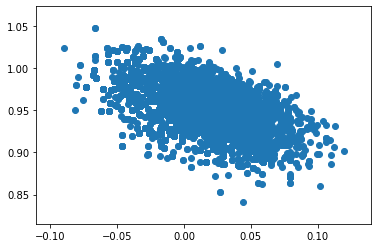

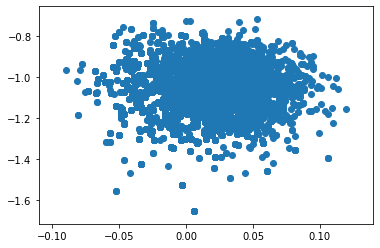

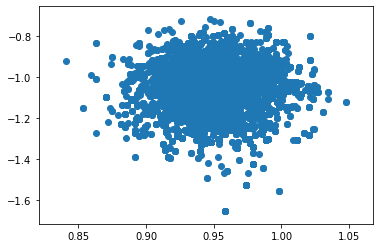

In [17]:
# belle ellipse de confiance
for i,j in [[0,1],[0,2],[1,2]]:
    plt.scatter(sample2[:,i],sample2[:,j],zorder=2)
    plt.show()

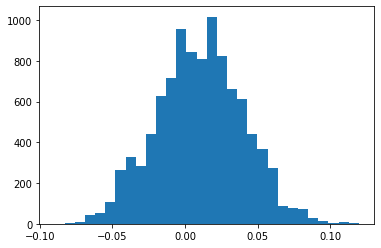

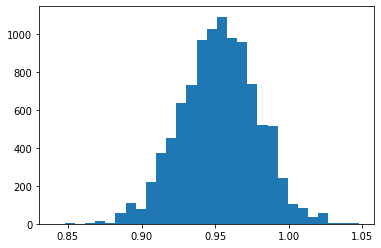

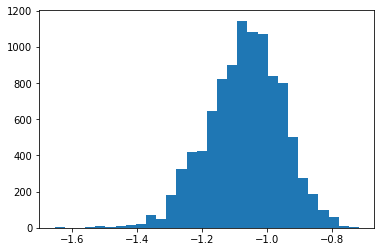

In [18]:
#belle normale
for i in range(sample2.shape[1]):
    plt.hist(sample2[:,i],bins=30)
    plt.show()

# Model Selection

In [ ]:
#généraliser le travail à des conditions de moments différentes
#creation d'une fonction de récupération du mode et de la hessienne en fonction du modele considéré

def model_hessian_model(model="M2"):
    t = 20
    alpha_s = np.linspace(-1,1,t)
    beta_s = np.linspace(0,2,t)
    v_s = np.linspace(-1,1,t)
    res = np.zeros((t,t,t))
    c=0

    for ix,i in enumerate(alpha_s):
        for jx,j in enumerate(beta_s):
            for lx,l in enumerate(v_s):
                x=np.array([i,j,l])
                v,_,_=calculate_posterior(x,y,z,model)
                if v==None:
                    continue
                res[ix,jx,lx] = v
                c+=1
                if c%50==0:
                    print(c)
    
    res[res==0]=-np.infty
    a,b,c = np.unravel_index(np.argmax(res, axis=None), res.shape)
    mean=np.array((alpha_s[a], beta_s[b],v_s[c]))
    cov = -inv(approx_hessian(mean[0],mean[1],mean[2],0.01,0.01,model)) 
    
    return(mean,cov)

def q(phi,mean,cov):
    multivariate_t_distribution(phi, mu=mean, Sigma=cov, df=3)


def log_coeff(phi,phi_tild,model,mean,cov):
    return(calculate_posterior(phi_tild,y,z,model)[0]-calculate_posterior(phi,y,z,model)[0]+np.log(q(phi,mean,cov))-np.log(q(phi_tild,mean,cov)))


In [ ]:
#step1
phi_tild,cov= model_hessian_model(model="M2") #je colle aux notations du papier mais je prends la moyenne de log posterior pour phi_tild_l (dépend du modele)
log_posterior, log_prior,log_px = calculate_posterior(phi_tild,y,z,model="M2")

#il ne manque plus que le troisieme terme de log mx 



In [ ]:
#step2
#numérateur il faut générer selon hastings et moyenniser
nburn=1000
niter1=1000
total1=0
alpha_0,beta_0,v_0=0.5,0.5,0.5 
print("phase 1")
for i in range(niter1+nburn):
    try:
        alpha_0,beta_0,v_0=iteration(alpha_0,beta_0,v_0,mean,cov)
    except:
        continue
    if i>=999:#on grille les premières générations
        print("youpi")
        gen= np.array([alpha_0,beta_0,v_0])
        total1+=exp(log_coeff(gen,phi_tild,"M2",phi_tild,cov))*q(phi_tild,phi_tild,cov)

E1=total1/niter1

print("phase 2")
#dénominateur
#génération plusieurs fois suivant q

niter2=1000
total2=0
for i in range(niter2):
    gen=multivariate_t_rvs(phi_tild, cov, df=3, n=1)[0]
    total2+=exp(log_coeff(phi_tild,gen,"M2",phi_tild,cov))
E2=total2/niter2    


In [ ]:
#Et Finalement
log_mx= log_prior+log_px-log(E1/E2)

A mettre dans l'overleaf,
la loi de proposition dépend du mode de la log etel qui elle dépend du model choisi, un peu bizarr
on veut - la hessienne, car la hessienne en le mode est définie négative donc on la rend définie positive comme ça c'est ce qu'on doit avoir pour une variance